In [158]:
import numpy as np
from sklearn.manifold import TSNE

# Random state.
RS = 5002

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [159]:
mid_dim = 64
num_classes = 4

# class labels of the AG News dataset
labels = ['World', 'Sports', 'Business', 'Tech']

def scatter(x, colors, k):
    # We choose a color palette with seaborn.
    palette = ['#FBDFE2', '#F4EEAC', '#C7DFF0', '#CFE7C4']
    proto_colors = ['#B83945', '#E3E457', '#377483', '#4F845C']

    total_samples = num_classes * (k+1)

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    for i in range(0, total_samples):
        if i % (k+1) == 0:
            sc = ax.scatter(x[i, 0], x[i, 1], lw=1, s=150, alpha=0.7, edgecolors='black', c=proto_colors[i//(k+1)])
        else:
            sc = ax.scatter(x[i, 0], x[i, 1], lw=1, s=150, alpha=0.7, edgecolors='black', c=palette[colors[i]])

    ax.axis('tight')

    # We add the labels for each class.
    txts = []
    for i in range(num_classes):
        # Position of each label.
        xtext, ytext = np.mean(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, labels[i], fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=2, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

def plot_tsne(k):
    # load embeddings
    X = np.load(str(k) + '-shot-proto.npy')

    X = X.reshape(-1, mid_dim)
    # normalize embeddings
    mu = X.mean(axis=1)
    std = X.std(axis=1)
    X = (X-mu.reshape(-1,1)) / std.reshape(-1,1)

    # groud truth labels for each example
    y = np.arange(num_classes).repeat(k+1)

    digits_proj = TSNE(random_state=RS, perplexity=(k)*num_classes).fit_transform(X)

    scatter(digits_proj, y, k)

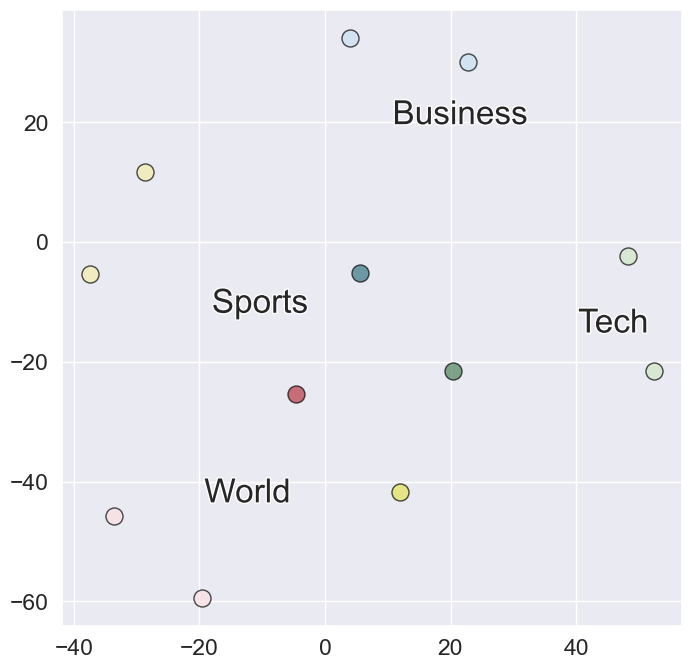

In [157]:
plot_tsne(2)

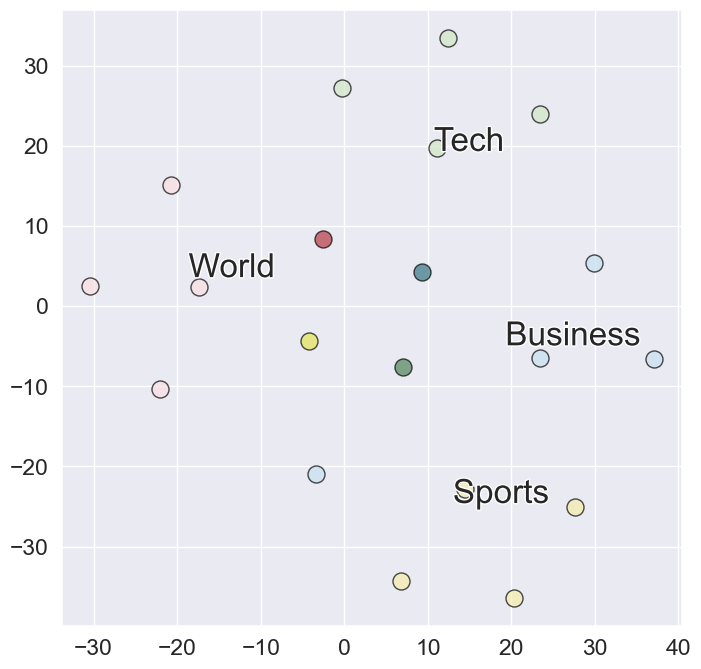

In [149]:
plot_tsne(4)

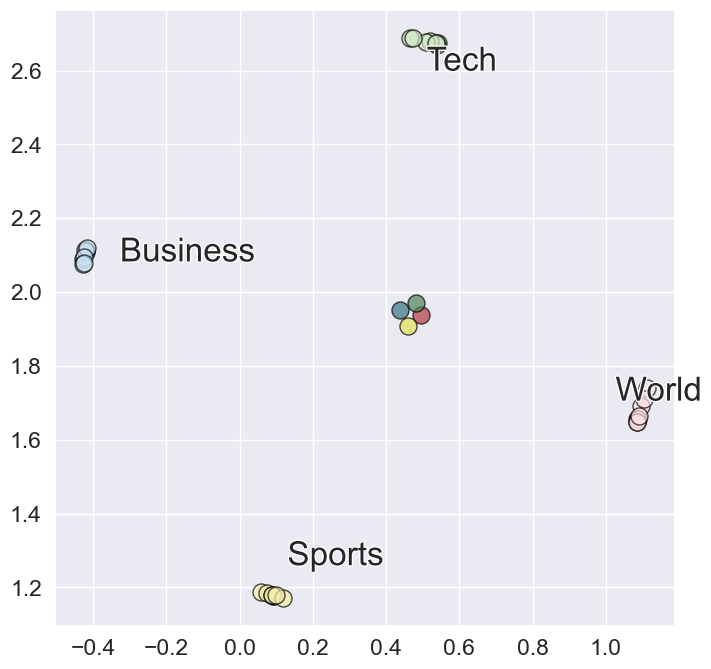

In [150]:
plot_tsne(8)

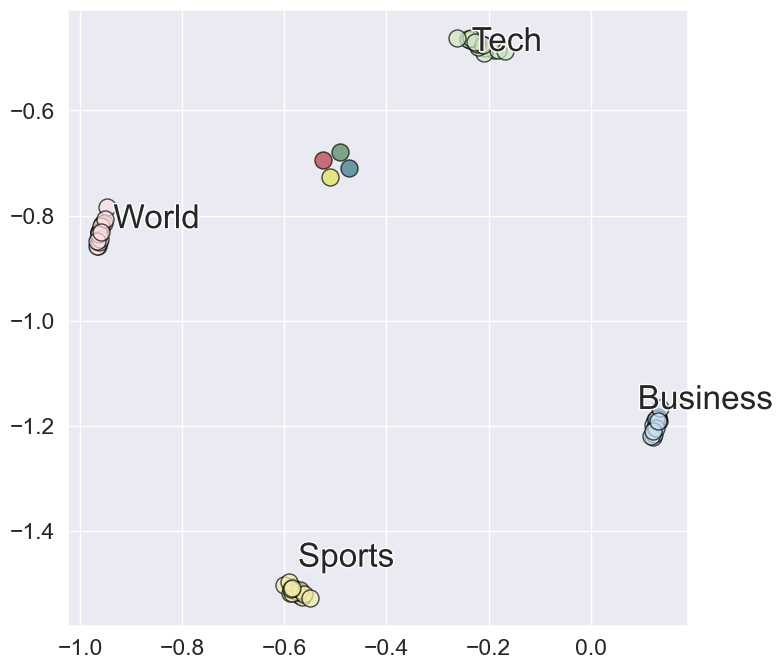

In [151]:
plot_tsne(16)